## Expand Gene identities

In [14]:
# %reset
import pandas as pd
location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/5.Papilio_polytes"

gene_table = pd.read_csv(f"{location}/2.Annotation_busco_prediction/full_table.tsv", sep= "\t")
gene_table

,Busco_id,Status,Sequence,Gene_Start,Gene_End,Strand,Score,Length,OrthoDB url,Description
0,0at7088,Complete,NW_013525035.1,3040958.0,2946170.0,-,16523.2,7670.0,https://v10-1.orthodb.org/?query=0at7088,Immunoglobulin
1,1at7088,Complete,NW_013525583.1,1133827.0,1183656.0,+,9271.9,4246.0,https://v10-1.orthodb.org/?query=1at7088,Immunoglobulin
2,2at7088,Complete,NW_013527915.1,5760031.0,5788649.0,+,7135.5,7062.0,https://v10-1.orthodb.org/?query=2at7088,EGF-like calcium-binding domain
3,3at7088,Complete,NW_013525046.1,1039495.0,1016018.0,-,10735.7,5417.0,https://v10-1.orthodb.org/?query=3at7088,Spectrin repeat
4,4at7088,Complete,NW_013527471.1,1814.0,101476.0,+,12335.9,6234.0,https://v10-1.orthodb.org/?query=4at7088,Spectrin repeat
...,...,...,...,...,...,...,...,...,...,...
5287,16668at7088,Complete,NW_013525102.1,3407141.0,3411446.0,+,163.0,128.0,https://v10-1.orthodb.org/?query=16668at7088,LOC101743693
5288,16739at7088,Complete,NW_013525058.1,952854.0,953456.0,+,90.5,44.0,https://v10-1.orthodb.org/?query=16739at7088,uncharacterized protein LOC111351003
5289,16855at7088,Complete,NW_013525135.1,2556070.0,2555577.0,-,146.5,98.0,https://v10-1.orthodb.org/?query=16855at7088,"AT hook, DNA-binding motif"
5290,16938at7088,Complete,NW_013524711.1,966664.0,963381.0,-,112.2,114.0,https://v10-1.orthodb.org/?query=16938at7088,uncharacterized protein LOC111359467


In [15]:
output = "Busco_id\tChromosome\tGene_Start\tGene_End"
for row_details in gene_table.itertuples():
    # print(row_details)
    # assert False
    if not(pd.isna(row_details.Sequence)):
        if row_details.Gene_Start > row_details.Gene_End:
            gene_start = row_details.Gene_End
            gene_end = row_details.Gene_Start
        else:
            gene_start = row_details.Gene_Start
            gene_end = row_details.Gene_End
        try:
            output += f"\n{row_details.Busco_id}\t{row_details.Sequence}\t{int(max(0,gene_start-10000))}\t{int(gene_end+10000)}"
        except:
            print(row_details.Busco_id, gene_end+20000)
            assert False
    # print(row_details)
    # break
with open(f"{location}/2.Annotation_busco_prediction/padded_10k.tsv", 'w') as out_file:
    out_file.write(output)

In [16]:
fst_dictionary = {}
# with open(f"{location}/1.FST_peaks_from_chris/two_pool_1%_0.259_5kb_merged.fst",'r') as fst_file:
with open(f"{location}/1.FST_peaks_from_chris/two_pool_5%_0.058_5kb_merged.fst",'r') as fst_file:
    for fst_lines in fst_file.readlines()[1:]:
        line_split = fst_lines.strip().split(",")
        fst_dictionary.setdefault(line_split[0],[])
        
        fst_dictionary[line_split[0]].append([int(line_split[1]), int(line_split[2])])
        
print(fst_dictionary)

{'NW_013524711.1': [[108001, 109000], [120001, 121000], [216001, 217000], [318001, 319000], [354001, 356000], [406001, 408000], [525001, 526000], [544001, 545000], [657001, 665000], [681001, 683000], [832001, 833000], [896001, 897000], [950001, 956000], [964001, 965000], [975001, 976000], [1036001, 1037000], [1053001, 1055000], [1179001, 1180000]], 'NW_013524712.1': [[30001, 31000], [37001, 38000], [62001, 67000], [106001, 107000], [116001, 117000], [132001, 133000], [361001, 362000], [391001, 392000], [404001, 405000]], 'NW_013524739.1': [[1, 1000]], 'NW_013524756.1': [[25001, 26000], [52001, 53000]], 'NW_013524767.1': [[54001, 55000], [108001, 109000], [206001, 208000], [232001, 248000], [253001, 255000], [260001, 261000], [341001, 342000], [379001, 380000]], 'NW_013524785.1': [[1, 1000]], 'NW_013524811.1': [[9001, 10000], [50001, 51000], [125001, 128000], [158001, 159000], [242001, 243000], [278001, 280000]], 'NW_013524822.1': [[21001, 22000], [128001, 129000], [145001, 146000], [24

In [17]:
gene_loc_dic = {}
with open(f"{location}/2.Annotation_busco_prediction/padded_10k.tsv", 'r') as gene_loc_file:
    for gene_line in gene_loc_file.readlines()[1:]:
        line_split = gene_line.strip().split("\t")
        gene_loc_dic[line_split[0]] = [line_split[1],line_split[2],line_split[3]]
# print(gene_loc_dic)
        

In [18]:
intersecting_genes = []
with open(f"{location}/3.Rho_set_genes/rho_set_cluster.txt", 'r') as rho_set_file:
    for rho_set_count,lines in enumerate(rho_set_file.readlines()):
        rho_gene_name = lines.strip().split("\t")[0]
        # print(lines.strip(),gene_loc_dic[lines.strip()])
        try:
            chromosome,start,end = gene_loc_dic[rho_gene_name]
        except:
            continue
        # print(chromosome,start,end)
        if chromosome in fst_dictionary:
            for sections in (fst_dictionary[chromosome]):
                # print(sections)
                if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
                    # print(sections)
                    print(lines, end = "")
                    intersecting_genes.append(rho_gene_name)
                    break
                # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
            # break
print("\n",len(intersecting_genes), rho_set_count, len(set((intersecting_genes))))
final_gene_number = len(intersecting_genes)

6835at7088
7993at7088
2036at7088
12705at7088
12831at7088
13413at7088
10801at7088
13986at7088
10549at7088
3016at7088
15035at7088
5821at7088
4317at7088
5884at7088
15100at7088
4368at7088
4021at7088
7060at7088
4480at7088
2905at7088
10192at7088
6122at7088
4998at7088
3023at7088
4163at7088
1947at7088
2599at7088
5251at7088
496at7088
8559at7088
821at7088
386at7088
4689at7088
5767at7088
6342at7088
721at7088
717at7088
7520at7088
3811at7088
13075at7088
13445at7088
9081at7088
9564at7088
13346at7088
6937at7088
14598at7088
4266at7088
5480at7088
1709at7088
8007at7088
3689at7088
3667at7088
741at7088
3284at7088
9535at7088
2936at7088
2906at7088
13019at7088
13774at7088
4595at7088
2372at7088
13623at7088
6853at7088
14391at7088
8465at7088
4631at7088
7622at7088
10506at7088
10666at7088
2547at7088
14949at7088
11592at7088
14339at7088
13737at7088
15565at7088
6512at7088
2031at7088
1637at7088
4279at7088
4935at7088
4645at7088
10268at7088
3161at7088
13356at7088
274at7088
12326at7088
2201at7088
12445at7088
2902at7088


In [19]:
gene_anno_dic = {}
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/19.Evolutionary_rate_co-variation(ERC)/2.Two_state/correlation_2_with_annotation.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0].split("_")[0][1:]
        anno_name = lines.split(",")[-1].replace('"', '')
        gene_anno_dic[gene_name]= anno_name.strip()

In [20]:
# instersecting_genes_output = ""
# for intersecting_gene_name in intersecting_genes:
#     if intersecting_gene_name in gene_anno_dic:
#         instersecting_genes_output += gene_anno_dic[intersecting_gene_name] + "\n"
#     else:
#         instersecting_genes_output += intersecting_gene_name + "\n"
# # print(intersecting_genes)
# with open(f"{location}/4.Intersections_test/intersection_set.txt", 'w') as out_file:
#     out_file.write(instersecting_genes_output)
# # print(instersecting_genes_output)

In [21]:
# instersecting_genes_output = "geneid\n"+"\n".join(set(intersecting_genes))
# with open(f"{location}/4.Intersections_test/1.For GSEA/1.Rho Set/intersection_set.txt", 'w') as out_file:
#     out_file.write(instersecting_genes_output)

In [22]:
busco_gene_list = []
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/0.Gene_id_list/Busco_gene_id.txt",'r') as busco_gene_list_file:
    for lines in busco_gene_list_file:
        busco_gene_list.append(lines.strip())
print(len(busco_gene_list))

4564


In [23]:
rho_set_size = rho_set_count
import random
intersecting_genes_length_list = []
for i in range(1000):
    print("run ",i)
    test_gene_list = random.sample(busco_gene_list, rho_set_size)
    # print(len(test_gene_list), len(set(test_gene_list)))
    # assert False
    intersecting_genes = []
    for j,gene_name in enumerate(test_gene_list):
        try:
            chromosome,start,end = gene_loc_dic[gene_name]
        except:
            print(gene_name, "missing")
            
        # print(chromosome,start,end)
        try:
            for sections in (fst_dictionary[chromosome]):
                # print(sections)
                if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
                    # print(sections)
                    # print(gene_name,chromosome,start,end)
                    intersecting_genes.append(gene_name)
                    break
                    # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
                # break
        except:
            pass
    print(j)
    
    intersecting_genes_length_list.append(len(intersecting_genes))
print((intersecting_genes_length_list))

run  0
8898at7088 missing
502
run  1
13223at7088 missing
8712at7088 missing
3823at7088 missing
cycle missing
502
run  2
1811at7088 missing
1319at7088 missing
6302at7088 missing
6602at7088 missing
11298at7088 missing
13223at7088 missing
7699at7088 missing
cry2 missing
502
run  3
8712at7088 missing
9492at7088 missing
7088at7088 missing
cycle missing
9775at7088 missing
502
run  4
10110at7088 missing
3926at7088 missing
2787at7088 missing
12481at7088 missing
502
run  5
7004at7088 missing
3926at7088 missing
502
run  6
12481at7088 missing
10153at7088 missing
13323at7088 missing
11298at7088 missing
7260at7088 missing
7088at7088 missing
502
run  7
14566at7088 missing
13321at7088 missing
7260at7088 missing
951at7088 missing
502
run  8
7699at7088 missing
12443at7088 missing
951at7088 missing
7473at7088 missing
12481at7088 missing
13406at7088 missing
502
run  9
4131at7088 missing
5364at7088 missing
3926at7088 missing
6099at7088 missing
13323at7088 missing
7004at7088 missing
13406at7088 missing
cry

In [24]:
# import numpy as np
# # print((intersecting_genes_length_list))
# str_list = ""
# for num in intersecting_genes_length_list:
#     str_list += f"{num}\n"
# with open(f"{location}/4.Intersections_test/10000_runs_5kb.txt", 'w') as out_file:
#     out_file.write(str_list)

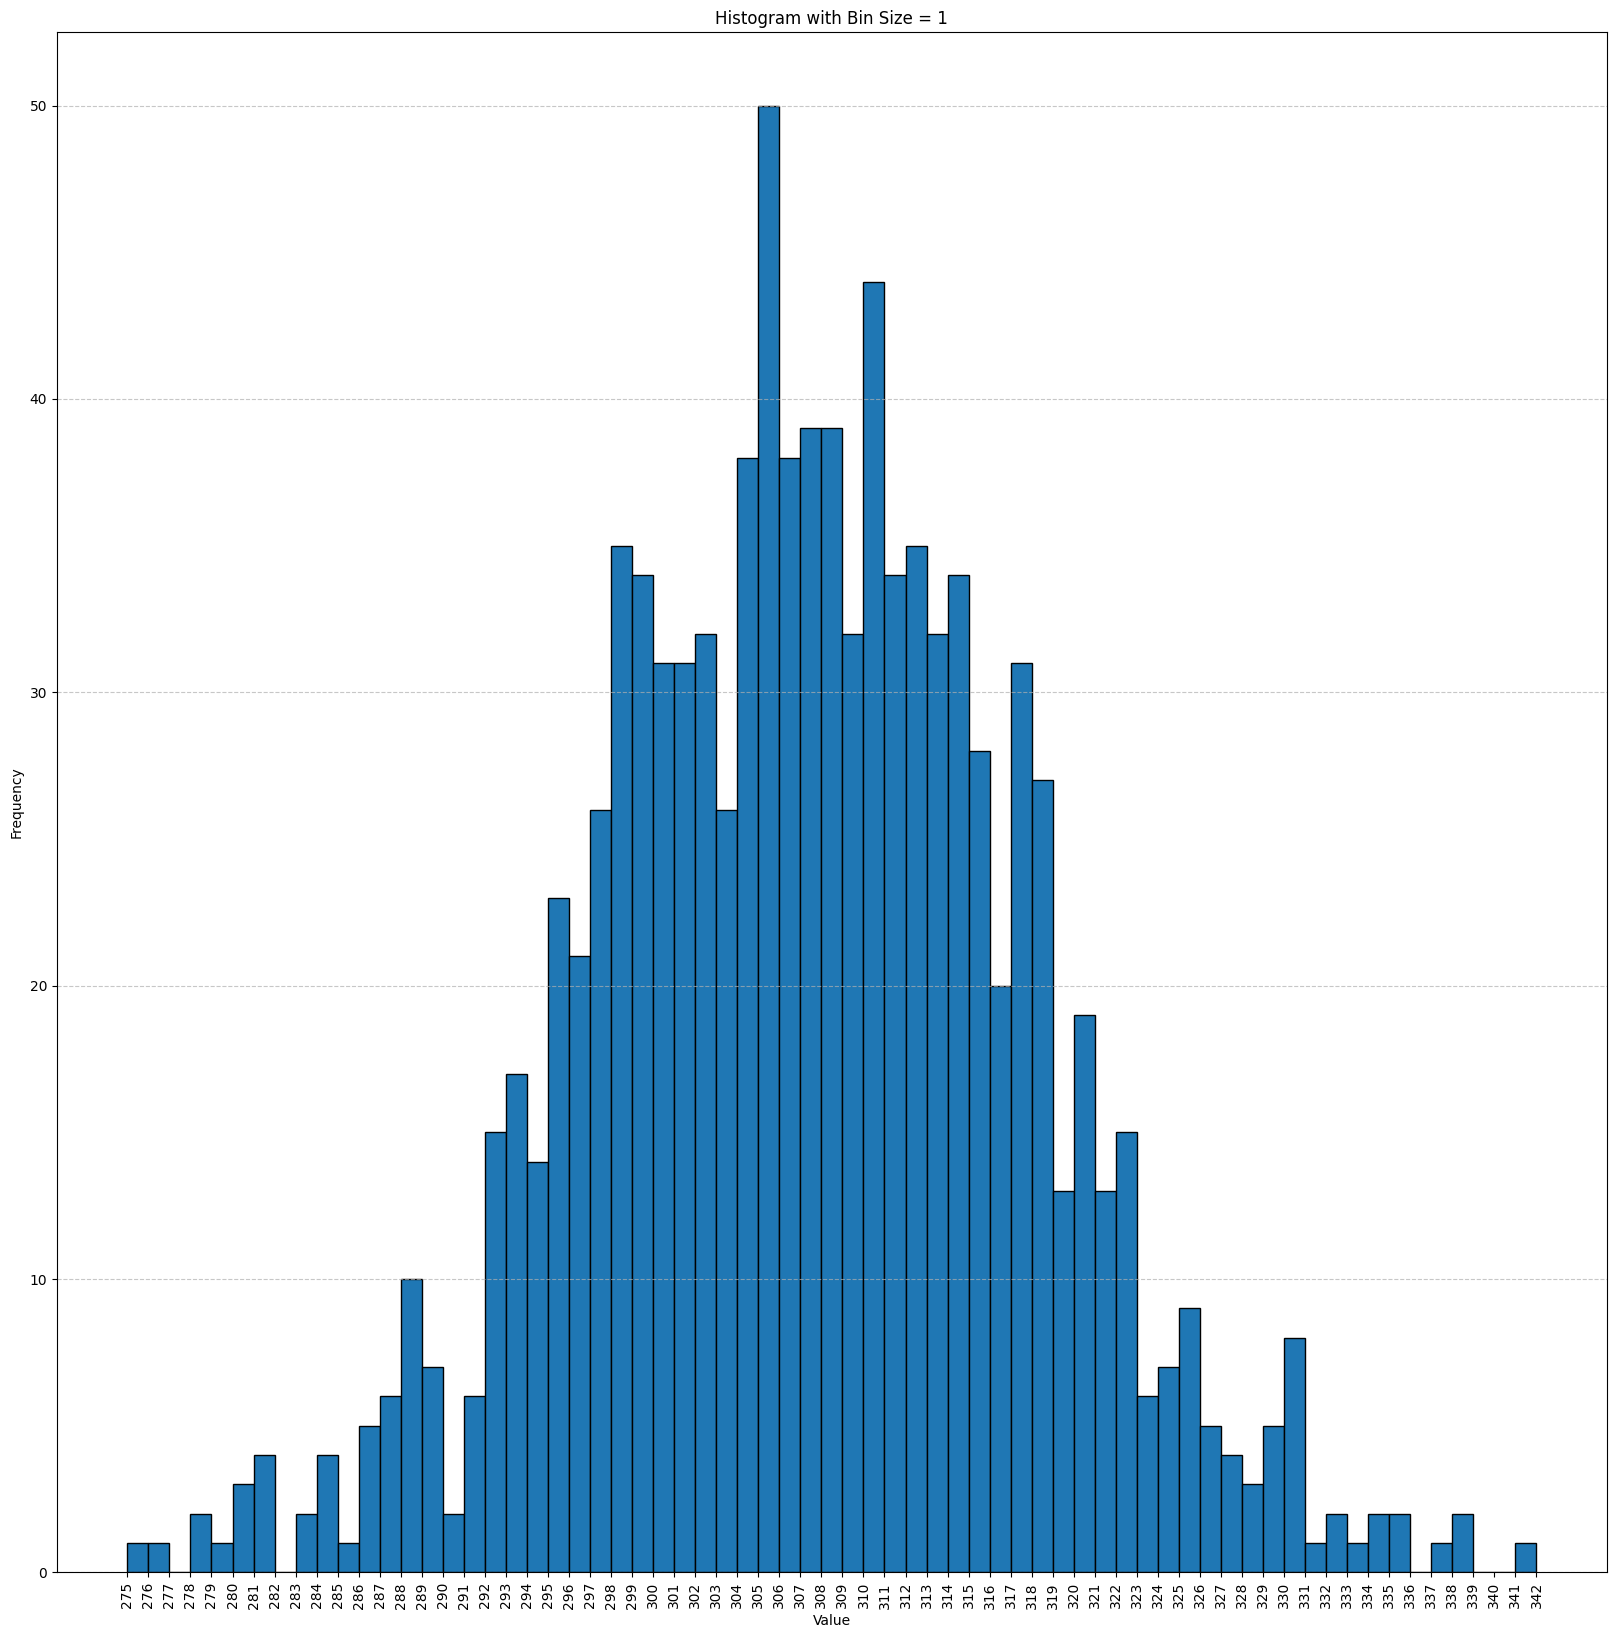

In [25]:
import matplotlib.pyplot as plt

# Sample data
data = intersecting_genes_length_list

# Define bins with size = 1
min_bin = min(data)
max_bin = max(data)
bins = range(min_bin, max_bin + 2)  # +2 to include the last value properly

# Plot
plt.figure(figsize=(20, 20))
plt.hist(data, bins=bins, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Bin Size = 1')
plt.xticks(bins)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.vlines(value_of_interest, 0,40)
plt.show()

In [26]:
# Always show details
import scipy.stats as stats

# Updated list of observations
observations = intersecting_genes_length_list

# [7, 7, 4, 7, 10, 2, 7, 10, 5, 10, 1, 0, 5, 4, 6, 7, 6, 9, 5, 1, 8, 7, 2, 10, 7, 9, 3, 11, 9, 0, 9, 5, 5, 2, 0, 12, 3, 6, 4, 2, 9, 5, 3, 2, 8, 2, 0, 6, 6, 1, 12, 3, 1, 3, 8, 12, 8, 0, 6, 4, 0, 7, 2, 7, 10, 2, 7, 3, 3, 1, 13, 8, 11, 8, 1, 6, 3, 0, 6, 5, 7, 2, 2, 7, 0, 11, 7, 9, 10, 8, 2, 4, 8, 7, 0, 3, 5, 0, 4, 8, 6, 4, 8, 1, 3, 5, 6, 6, 6, 0, 4, 6, 4, 2, 4, 4, 5, 10, 10, 0, 5, 3, 1, 7, 5, 2, 0, 0, 3, 0, 7, 8, 10, 6, 3, 4, 2, 8, 8, 0, 7, 5, 0, 7, 6, 5, 1, 0, 9, 7, 1, 13, 2, 10, 3, 9, 9, 5, 1, 5, 6, 7, 1, 2, 10, 8, 7, 1, 7, 6, 9, 5, 0, 11, 0, 0, 6, 2, 1, 1, 1, 6, 4, 9, 8, 4, 5, 9, 4, 15, 9, 0, 2, 0, 1, 3, 10, 3, 9, 3, 4, 2, 1, 7, 4, 1, 1, 5, 3, 4, 14, 0, 0, 5, 5, 8, 7, 0]

# Calculate the proportion of values greater than or equal to 10
value_of_interest = final_gene_number
print(value_of_interest)
count_extreme = sum(x >= value_of_interest for x in observations)
p_value = count_extreme / len(observations)

p_value

303


0.666

In [27]:
output = "Count"
for count in intersecting_genes_length_list:
    output += f"\n{count}"
with open(f"/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/7.Manhatten/1.Density_plots_5/papilio_density_plot_x_{final_gene_number}_p_{p_value}.csv", 'w') as out_file:
    out_file.write(output)

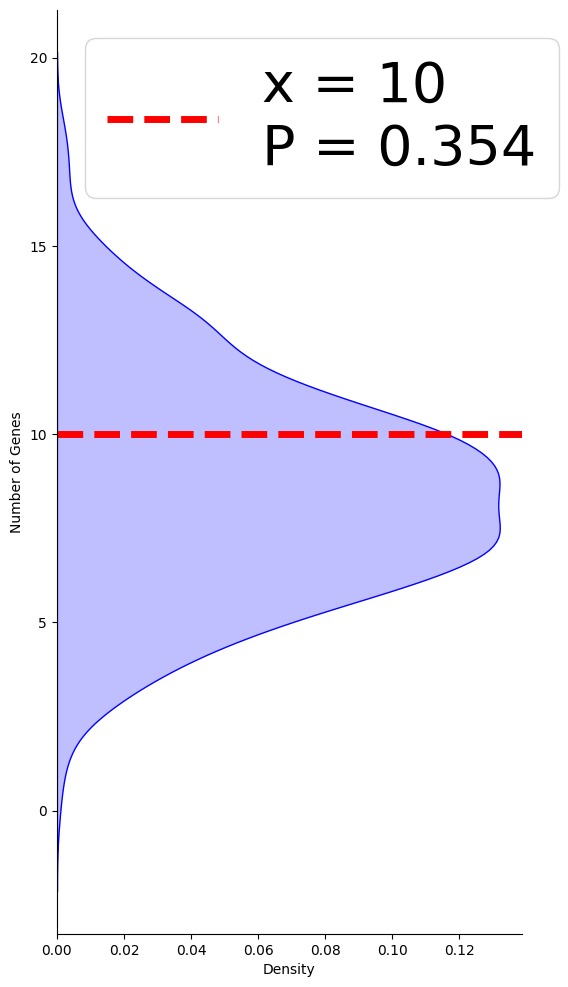

In [27]:
import seaborn as sns
plt.figure(figsize=(6, 12))
sns.kdeplot(y=data, fill=True, linewidth=1, color="blue")

# Vertical line at defined place (example: x=10)
defined_value = value_of_interest
plt.axhline(defined_value, color='red', linestyle='--', linewidth=5, label=f"x = {defined_value}\nP = {p_value}")
sns.despine(top=True, right=True)
plt.ylabel("Number of Genes")
plt.xlabel("Density")
# plt.title("Smooth Density Plot with Vertical Line")
plt.legend(fontsize=40)
# plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.savefig("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/7.Manhatten/2.Density_plot_1%/polytes_density_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()